# A Visual Exploration and Statistical Analysis of a Diabetes Dataset using Python

# By: Noureddin Sadawi, PhD

## This Dataset is Freely Available

### Overview:
The data was collected and made available by the "National Institute of Diabetes and Digestive and Kidney Diseases" as part of the Pima Indians Diabetes Database. 

`Diabetes.csv` is available [from Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). We have several questions - what information is more correlated with a positive diagnosis, and if we can only ask two questions to a patient, what should we ask and how would we give them a risk of being diagnosed.

This is a machine learning database, and normally we'd just extract features, feed to a ML algorithm and sit back and relax. But we'll get our hands dirty so that you can learn more.

We'll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use.

We will also use numpy to convert out data into a format suitable to feed our classification model. 

We'll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build a classification model. 

++++++++++++++++++++++++++++++++++++

The following features have been provided to help us predict whether a person is diabetic or not:
* **Pregnancies:**  Number of times pregnant
* **Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* **BloodPressure:** Diastolic blood pressure (mm Hg)
* **SkinThickness:** Triceps skin fold thickness (mm)
* **Insulin:** 2-Hour serum insulin (mu U/ml)
* **BMI:** Body mass index (weight in kg/(height in m)2)
* **DiabetesPedigreeFunction:** Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* **Age:** Age (years)
* **Outcome:** Class variable (0 if non-diabetic, 1 if diabetic)


## Scenario: Imagine you have collected this data and wish to analyse it

In [1]:
### Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from chainconsumer import ChainConsumer

import plotly.graph_objects as go
from scipy.stats import multivariate_normal as mn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data and view first few rows

In [2]:
data = pd.read_csv("Diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35      NaN  33.6   
1            1     85.0             66             29      NaN  26.6   
2            8    183.0             64              0      NaN  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1

# 1- Basic Exploration and Cleaning up

### Missing and Zero Values

* It is clear the data has missing and zero values
* For example, we can see that SkinThickness = 0 in the third row
* And we can also see some 'NaN' values
* Sometimes missing values are represented by a '?'
* Let's get more info

### Viewing more details about the data

We can use the `describe` function and it will give us more details about the numeric columns

In [3]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     768.000000     768.000000  394.000000   
mean      3.845052  121.686763      69.105469      20.536458  155.548223   
std       3.369578   30.535641      19.355807      15.952218  118.775855   
min       0.000000   44.000000       0.000000       0.000000   14.000000   
25%       1.000000   99.000000      62.000000       0.000000   76.250000   
50%       3.000000  117.000000      72.000000      23.000000  125.000000   
75%       6.000000  141.000000      80.000000      32.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### Dealing with Missing and Zero Values

#### YOU decide what to do!

In [4]:
# If the data uses '?' for missing values then we can replace them with a NaN
#data.replace('?', np.NaN, inplace=True)

# using isnull() function  
#print(data.isnull().any().sum())
#print(data.isnull().sum())
#df.isnull()

In [5]:
## Insulin has a large number of missing values .. so we can drop that column
data = data.drop('Insulin', axis=1)

In [6]:
### Drop all rows that contain missing values?
data = data.dropna()
#data.shape

#### The Mean and Median

* **The mean** is the simple mathematical average of a list of two or more numbers. 
* **The median** is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average.

https://www.investopedia.com/terms-beginning-with-m-4769363

In [7]:
### Replace missing values in each column with the mean or median of that column
#data.fillna(df.mean())
#data.fillna(df.median())

#### Deal with Zero Values that Don't Make Sense

In [8]:
## get data where non of the columns has 0 value (except the first and last columns)
data = data[~(data[data.columns[1:-1]] == 0).any(axis=1)]
#data.shape

### Some Summary Information After Data Cleanup

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [10]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   532.000000  532.000000     532.000000     532.000000  532.000000   
mean      3.516917  121.030075      71.505639      29.182331   32.890226   
std       3.312036   30.999226      12.310253      10.523878    6.881109   
min       0.000000   56.000000      24.000000       7.000000   18.200000   
25%       1.000000   98.750000      64.000000      22.000000   27.875000   
50%       2.000000  115.000000      72.000000      29.000000   32.800000   
75%       5.000000  141.250000      80.000000      36.000000   36.900000   
max      17.000000  199.000000     110.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                532.000000  532.000000  532.000000  
mean                   0.502966   31.614662    0.332707  
std                    0.344546   10.761584    0.471626  
min                    0.085000   21.000000    0.000000  
25%                    0.258750   23.000000    0.000000  
50%                    0.416000   28.000000    0.000000  
75%                    0.658500   38.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [11]:
## check the mean of values depending on their category (i.e. 0 or 1)
data.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness        BMI  \
Outcome                                                                     
0           2.926761  110.016901      69.912676      27.290141  31.429577   
1           4.700565  143.118644      74.700565      32.977401  35.819774   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.446315  29.222535  
1                        0.616588  36.412429

![title](https://miro.medium.com/max/1020/1*hxVvqttoCSkUT2_R1zA0Tg.gif)
Image Source: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55


In [12]:
# the difference between the mean and median is a good indicator of how much skewed your data is!
data.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          2.926761      2  110.016901  106.0     69.912676     70   
1          4.700565      4  143.118644  144.0     74.700565     74   

        SkinThickness               BMI        DiabetesPedigreeFunction  \
                 mean median       mean median                     mean   
Outcome                                                                   
0           27.290141     27  31.429577   30.9                 0.446315   
1           32.977401     32  35.819774   34.6                 0.616588   

                      Age         
        median       mean median  
Outcome                           
0        0.368  29.222535   25.0  
1        0.542  36.412429   35.0

# 2- Useful and Informative Plots

## Histogram Plots

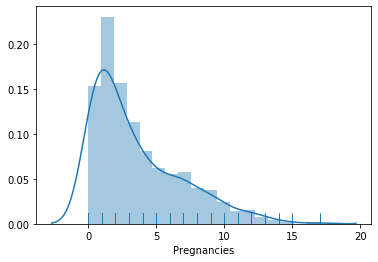

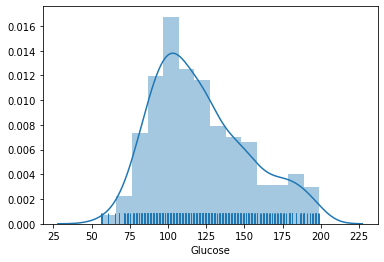

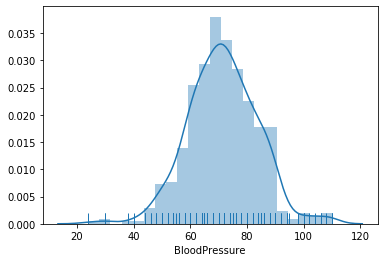

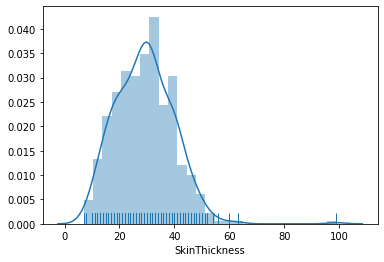

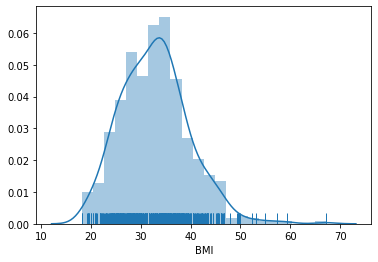

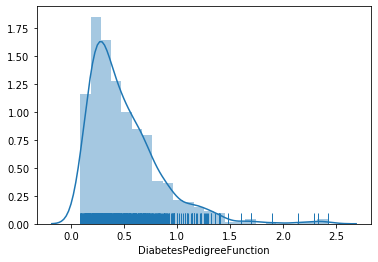

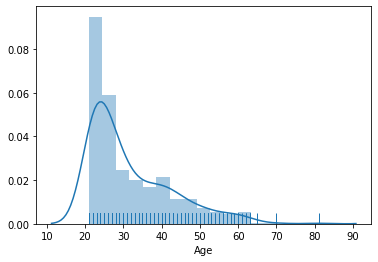

In [13]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
for i,col in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.distplot(data[col], rug=True);

## Scatter Matrix

* This one is a useful one liner ... but note that it only works with numeric data
* If you want to include categorical data in there you should convert the categories into numeric labels

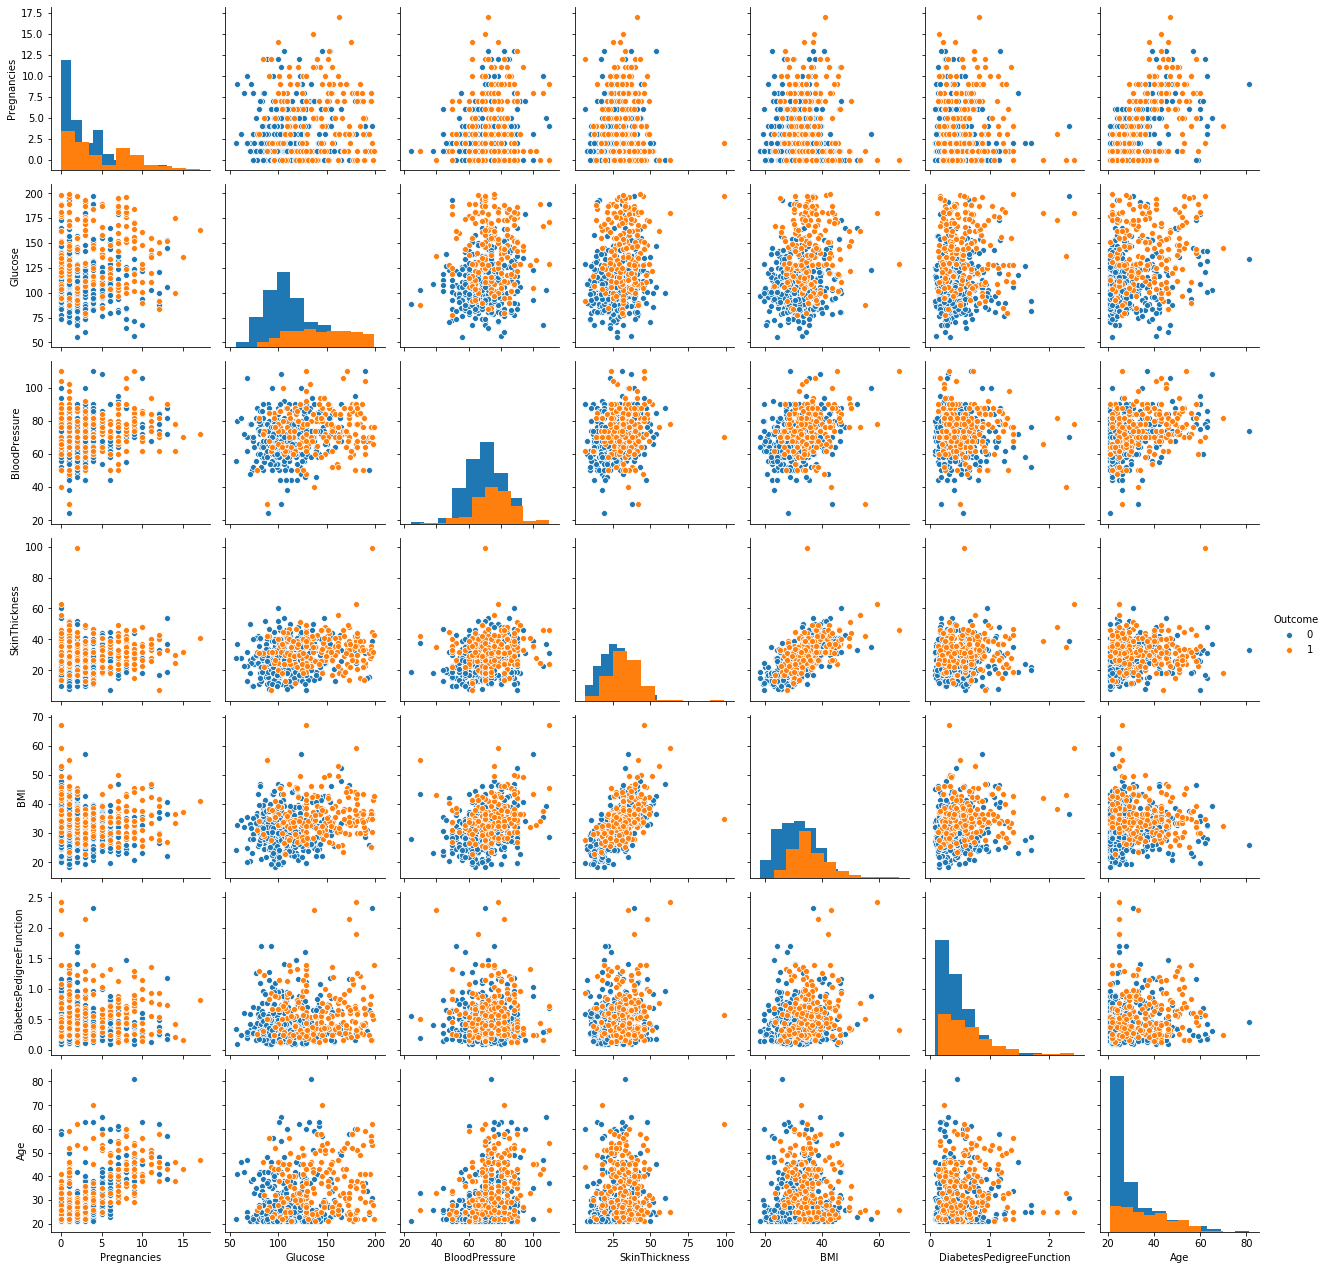

In [14]:
sns.pairplot(data, hue="Outcome", diag_kind = 'hist');

The scatter plot gives us both the histograms for the distributions along the diagonal, and also a lot of 2D scatter plots off-diagonal. Not that this is a symmetric matrix, so we normally just look at the diagonal and below/above it. We can see that some variables have a lot of scatter and some are correlated (ie there is a direction in their scatter). Which leads us to...

## Correlation Plots

To easily quantify which variables / attributes are correlated with others!

https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/

* Correlation is usually an indicative of good information content
* So in analysis you might want to use variables that are correlated with your outcome variable!

In [15]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.125330       0.204663       0.095085   
Glucose                      0.125330  1.000000       0.219178       0.226590   
BloodPressure                0.204663  0.219178       1.000000       0.226072   
SkinThickness                0.095085  0.226590       0.226072       1.000000   
BMI                          0.008576  0.247079       0.307357       0.647422   
DiabetesPedigreeFunction     0.007435  0.165817       0.008047       0.118636   
Age                          0.640747  0.278907       0.346939       0.161336   
Outcome                      0.252586  0.503614       0.183432       0.254874   

                               BMI  DiabetesPedigreeFunction       Age  \
Pregnancies               0.008576                  0.007435  0.640747   
Glucose                   0.247079                  0.165817  0.278907   
BloodPressure             0.307357                  0.008047  0.346939   
SkinThickness             0.647422                  0.118636  0.161336   
BMI                       1.000000                  0.151107  0.073438   
DiabetesPedigreeFunction  0.151107                  1.000000  0.071654   
Age                       0.073438                  0.071654  1.000000   
Outcome                   0.300901                  0.233074  0.315097   

                           Outcome  
Pregnancies               0.252586  
Glucose                   0.503614  
BloodPressure             0.183432  
SkinThickness             0.254874  
BMI                       0.300901  
DiabetesPedigreeFunction  0.233074  
Age                       0.315097  
Outcome                   1.000000

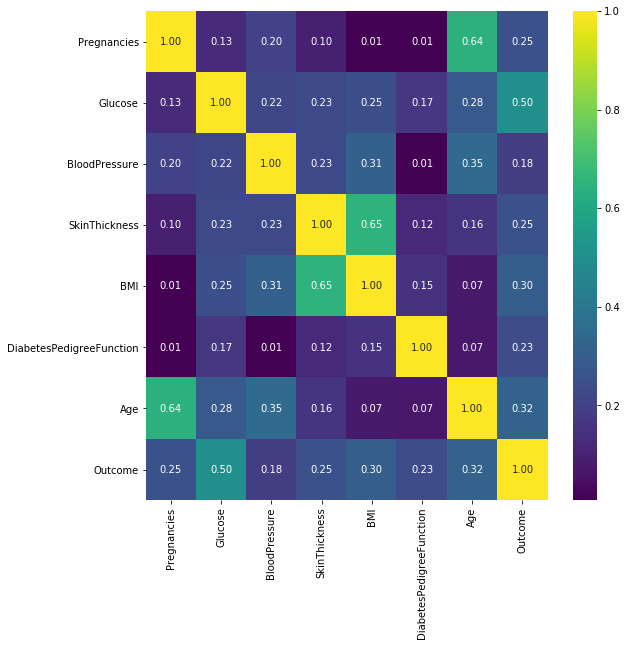

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()), annot=True, cmap="viridis", fmt="0.2f");

And you can see this is a symmetric matrix too. But it immedietly allows us to point out the most correlated and anti-correlated attributes. Some might just be common sense - Pregnancies v Age for example - but some might give us real insight into the data.

* It allows to see what we need to investigate and which variables we can focus on if we do not have the time and resources to investigate every possible column

## Covariance Plot

Covariance is a measure of how much two random variables vary together.

In other words, it is the measure of the joint spread between two random variables.

https://www.statisticshowto.com/covariance/

In [17]:
data.cov()

Pregnancies     Glucose  BloodPressure  \
Pregnancies                 10.969581   12.867664       8.344537   
Glucose                     12.867664  960.952013      83.640131   
BloodPressure                8.344537   83.640131     151.542341   
SkinThickness                3.314235   73.921060      29.288047   
BMI                          0.195458   52.704249      26.035648   
DiabetesPedigreeFunction     0.008485    1.771041       0.034132   
Age                         22.837981   93.043626      45.961687   
Outcome                      0.394549    7.362856       1.064975   

                          SkinThickness        BMI  DiabetesPedigreeFunction  \
Pregnancies                    3.314235   0.195458                  0.008485   
Glucose                       73.921060  52.704249                  1.771041   
BloodPressure                 29.288047  26.035648                  0.034132   
SkinThickness                110.752004  46.883706                  0.430168   
BMI                           46.883706  47.349659                  0.358254   
DiabetesPedigreeFunction       0.430168   0.358254                  0.118712   
Age                           18.271898   5.438223                  0.265684   
Outcome                        1.265023   0.976516                  0.037874   

                                 Age   Outcome  
Pregnancies                22.837981  0.394549  
Glucose                    93.043626  7.362856  
BloodPressure              45.961687  1.064975  
SkinThickness              18.271898  1.265023  
BMI                         5.438223  0.976516  
DiabetesPedigreeFunction    0.265684  0.037874  
Age                       115.811687  1.599256  
Outcome                     1.599256  0.222431

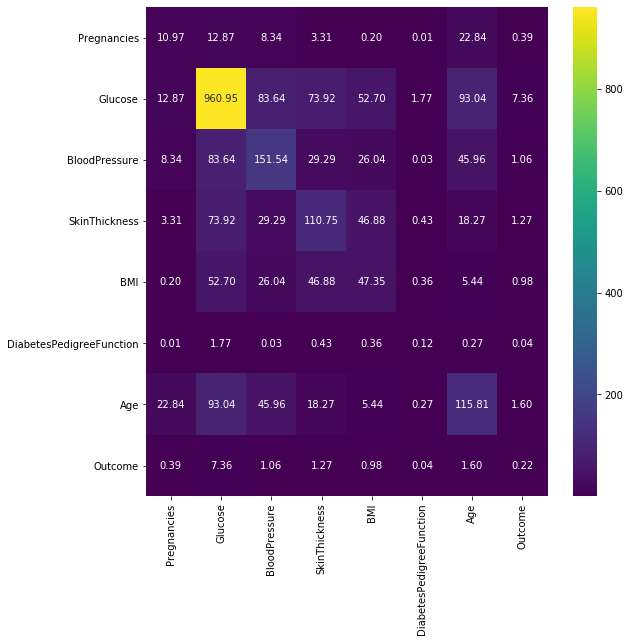

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.cov()), annot=True, cmap="viridis", fmt="0.2f");

## Box Plots, Violin Plots and Bee Swarm Plots

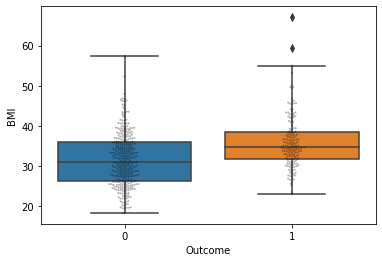

In [19]:
sns.boxplot(x="Outcome", y="BMI", data=data, whis=3.0);
sns.swarmplot(x="Outcome", y="BMI", data=data, size=2, color="k", alpha=0.3);

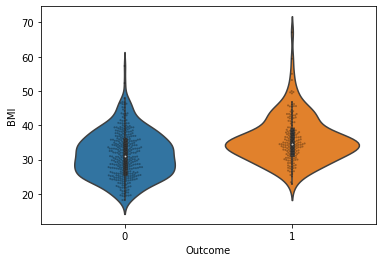

In [20]:
sns.violinplot(x="Outcome", y="BMI", data=data);
sns.swarmplot(x="Outcome", y="BMI", data=data, size=2, color="k", alpha=0.3);

## 2D Histograms


Useful when you have a *lot* of data ... i.e. at least 1000's of points

[See here for the API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

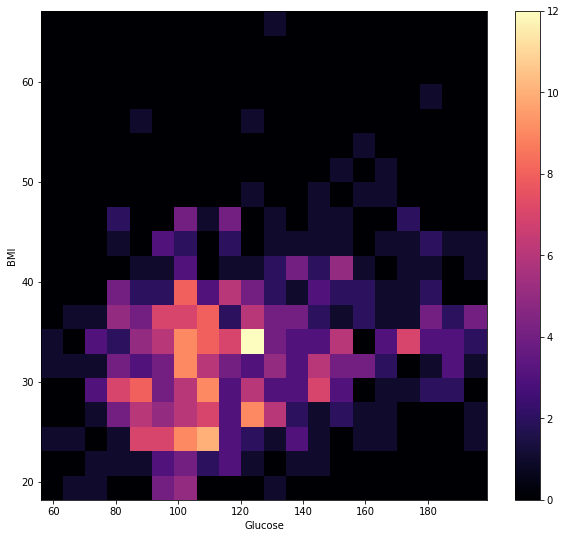

In [21]:
plt.figure(figsize=(10,9))
plt.hist2d(data["Glucose"], data["BMI"], bins=(20,20), cmap="magma")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar();

## Contour plots

A bit hard to get information from the 2D histogram isnt it? Too much noise in the image. What if we try and contour diagram? We'll have to bin the data ourself. The [contour API is here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html)

* Contour plots help us make the correlation in the data a bit more obvious
* But remember .. they require a lot of data

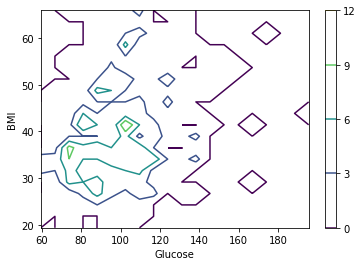

In [22]:
## remember we do not have a large number of points
hist, x_edge, y_edge = np.histogram2d(data["Glucose"], data["BMI"], bins=20)
# here we want the centers of the bins
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=3)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.colorbar();

* Looks like its just as noisy with the contour plot
* In general, for 2D histograms and contour plots, have a lot of data
* We simply don't have enough data to get smooth results!

## KDE Plots

With these plots we smooth the data ourselves. [Seaborn to the rescue!](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

* KDE smooths the data for you and gives you an approximation
* The smooth surface is not the real data, it is something we have done to it using a kernel density
* A kernel specifies how we are smoothing the data
* By default here we are using a Gaussian kernel
* It takes the 2D histogram and convolves it with a kernel (in the shape of a Gaussian) to smear it

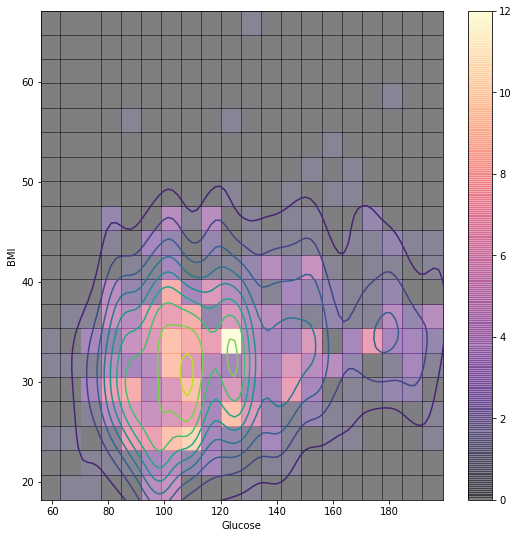

In [23]:
plt.figure(figsize=(9,9))
sns.kdeplot(data["Glucose"], data["BMI"], cmap="viridis", bw=(4, 4));
plt.hist2d(data["Glucose"], data["BMI"], bins=20, cmap="magma", alpha=0.5)
plt.colorbar();

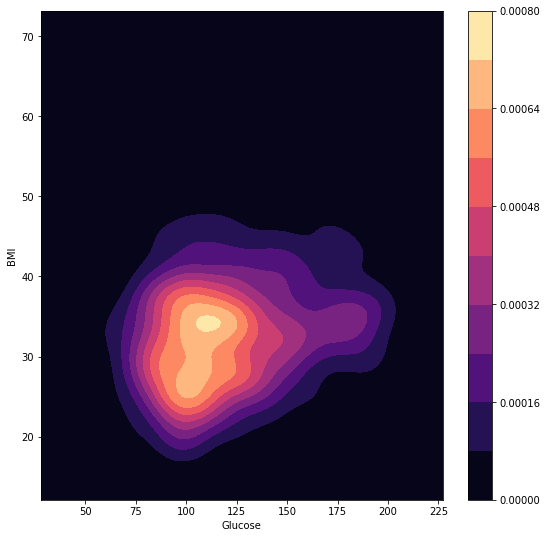

In [24]:
plt.figure(figsize=(9,9))
sns.kdeplot(data["Glucose"], data["BMI"], cmap="magma", shade=True, cbar=True);

## No Harm in keeping it Simple

A scatter plot is normally fairly informative and very fast to plot.

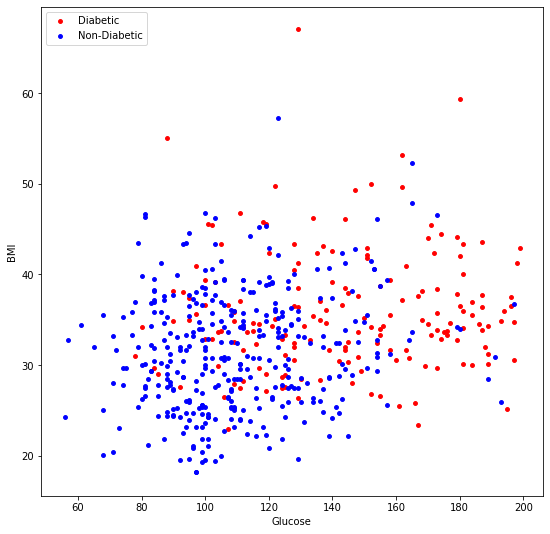

In [25]:
plt.figure(figsize=(9,9))

m = data["Outcome"] == 1
plt.scatter(data.loc[m, "Glucose"],  data.loc[m, "BMI"], c="r", s=15, label="Diabetic")
plt.scatter(data.loc[~m, "Glucose"], data.loc[~m, "BMI"], c="b", s=15, label="Non-Diabetic")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(loc=2);

* Looking at the scatter plot above, can we make some useful informed guesses?
* Given the level of Glucose and BMI of a random person, can we guess if they are diabetic? 

## Treating Points with Probability

Using the library ChainConsumer ([examples here](https://samreay.github.io/ChainConsumer/examples/index.html)). written by Samuel Hinton.

It is easy to install:

`pip install chainconsumer`

In [46]:
params = ["Glucose", "BMI"]
diabetic = data.loc[m, params].values
non_diabetic = data.loc[~m, params].values
#non_diabetic.shape

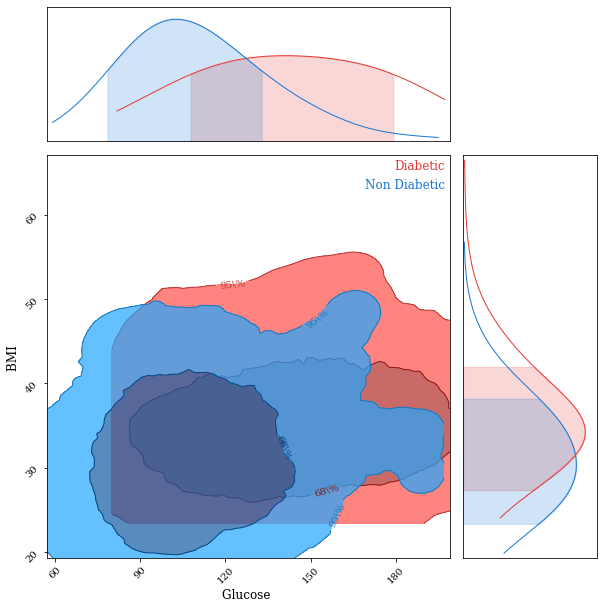

In [27]:
c = ChainConsumer()
# a chain represents a sampling of a population that conforms to some statistical properties
c.add_chain(diabetic, parameters=params, name="Diabetic", kde=1.0, color="r")
c.add_chain(non_diabetic, parameters=params, name="Non Diabetic", kde=1.0, color="b")
c.configure(contour_labels="confidence", usetex=False)
c.plotter.plot(figsize=3.0);

* It gives you two contours for each chain, one for the 68% confidence interval and the other is for the 95% confidence interval
* This is useful when doing Hypothesis testing
* For example, if you randomly pick a Diabetic person out of a different data sample, you can say that 68% of the time we would expect their BMI and Glucose levels to lie within the 68% contour, and 95% of the time their BMI and Glucose levels would lie in the second contour.
* This is useful when you would like to check if a data point comes from this distrbution or not
* For example, you can check where the data point lies and estimate the chance of it being of a Diabetic or Non Diabetic person

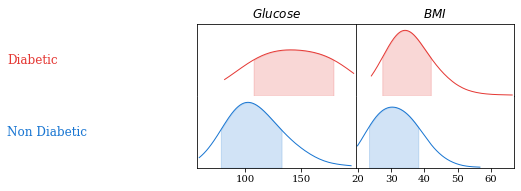

In [28]:
# Here we can have a look at the 1D distriutions
c.plotter.plot_summary(figsize=2.0);

* If we ignore the correlations, we can visually see that Diabetic individuals have higher Glucose levels that Non Diabetic individuals
* They also tend to have a higher BMI (look at the tail of the curve)

# 3- A Probabilistic Analysis

Based on the previous Correlation plot, a simple approach might be just to use the top correlated variables and investigate them further. In our case, they're: Glucose, BMI and Age.

* We will not use "Pregnancies" because we will not pay attention to Gender
* And we will not use "DiabetesPedigreeFunction" because we do not expect patients to know its value when they come to a clinic!

In [29]:
## get these columns only
data = data[["Glucose", "BMI", "Age", "Outcome"]]

In [30]:
## Split data into 2 dataframes (subdatasets), one for Diabetic and the other for Non Diabetic
df_y = data.loc[data["Outcome"] == 1, ["Glucose", "BMI", "Age"]]
df_n = data.loc[data["Outcome"] == 0, ["Glucose", "BMI", "Age"]]

## Create an interactive 3D plot using the two subdatasets
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'],mode='markers',marker=dict(color="red"),name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'],mode='markers',marker=dict(color="blue"),name='Non Diabetic'))

fig.show()

### Scatter matrix for the Diabetic Subdataset

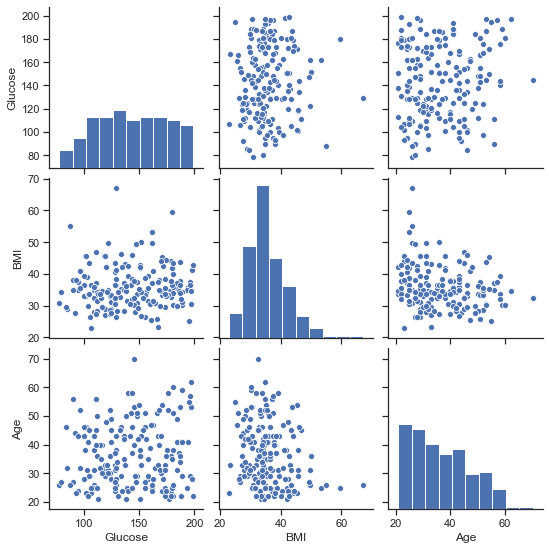

In [31]:
sns.set(style="ticks")
sns.pairplot(df_y, diag_kind = 'hist');

### Scatter matrix for the Non Diabetic Subdataset

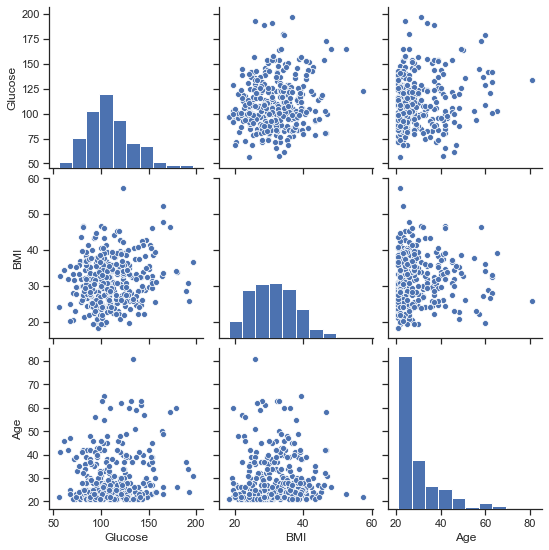

In [32]:
sns.set(style="ticks")
sns.pairplot(df_n, diag_kind = 'hist');

So its not perfect, but we can probably do an alright job approximating both these distributions as Gaussians.

## Multivariate Normal Distribution
Allows us to model Glucose, BMI and Age as a normal in 3 dimensions rather than 3 independent normals. That way we can have correlations between them.

### Plot the data in 3D and Add a Test Point

In [33]:
# our test point .. this can be a patient who has just walked into a clinic
test_point = [110, 35, 52]

## We have seen this plotting before .. here we just add the test point
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_y['Glucose'], y=df_y['BMI'], z=df_y['Age'],mode='markers',marker=dict(color="red"),name='Diabetic'))
fig.add_trace(go.Scatter3d(x=df_n['Glucose'], y=df_n['BMI'], z=df_n['Age'],mode='markers',marker=dict(color="blue"),name='Non Diabetic'))
fig.add_trace(go.Scatter3d(x=[test_point[0]], y=[test_point[1]], z=[test_point[2]],mode='markers',marker=dict(color="cyan"),name='Test'))

fig.show()

In [34]:
# Here we take each subdataset separately, fit a Multivariate Normal PDF to it
# and then use the PDF to predict the probability of our test point belonging to
# data of the same type as the subdataset (i.e. Diabetic or Not)
prob_test = []
for d in [df_y, df_n]:
    mean = np.mean(d) # compute the mean of our subdataset
    cov = np.cov(d, rowvar=0) # compute the covariance of our subdataset
    # Here we evaluate the probabilities at all the points we have prepared previously
    # Basically we pass the points to the pdf and say evaluate it using this mean and covariance
    prob  = mn.pdf(test_point, mean, cov)
    prob_test.append(prob)

### Diagnosis Probability for the Test Point (i.e. Unknown Patient)

In [35]:
## Here we compute the weighted probability of the test point being Positive (Diabetic)
## Notice how we apply the weighting
num_y = df_y.shape[0]
num_n = df_n.shape[0]
#print("Number of people with Diabetes is: ", num_y)
#print("Number of people without Diabetes is: ", num_n)
prob_diagnosis = num_n * prob_test[1] / (num_y * prob_test[0] + num_n * prob_test[1])
print(f"Negative diagnosis chance is {100 * prob_diagnosis:.2f}%")

Negative diagnosis chance is 50.38%


### Very Important to Notice:
* You should notice how the probability is weighted.
* The weighting is done to account for the imbalance (remember there are far more patients without diabetes than with)
* We can only directly compare the two distributions if they have equal probability all up (same number of people with and without)
* This might seem odd even if the test patient is right on the maximum of our model for the diabetes patients
* This is rarely the case, and so we have to weight them

# 4- Predicting Diabetes with Logistic Regression

* Logistic Regression measures the relationship between the dependent variable (our Outcome or what we want to predict) and one or more independent variables (our features or input variables), by estimating probabilities using its underlying **logistic function**
* These probabilities must then be transformed into binary values in order to actually make a prediction
* This is the task of the **logistic function**, also called the **sigmoid function**
* The **Sigmoid-Function** is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits
* The values between 0 and 1 will then be transformed into either 0 or 1 using a threshold classifier

More here: https://machinelearning-blog.com/2018/04/23/logistic-regression-101/

In [36]:
## save values of input variables in X and values of the outcome variable in y
X, y = data.values[:,:-1], data.values[:,-1]

In [37]:
## Split the data randomly into two sets: training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y)

In [38]:
## Fit the model into the training data
model = LogisticRegression()
_ = model.fit(X_train, y_train)

In [39]:
## Evaluate the model using the test data
accuracy = model.score(X_test, y_test)
#print("accuracy = ", accuracy * 100, "%")

### Interpreting the Model

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect on the outcome

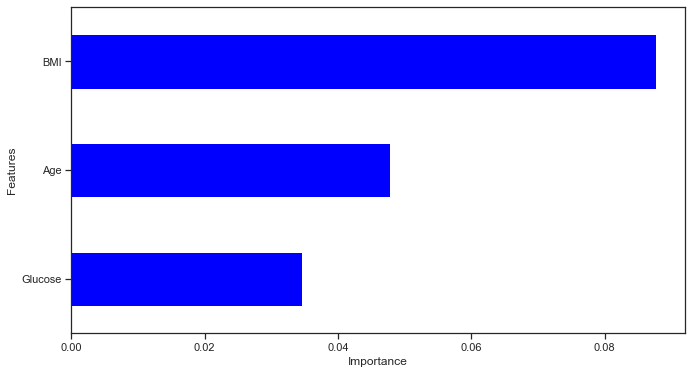

In [40]:
coeff = list(model.coef_[0])
labels = data.columns[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

In [41]:
features

importance  positive
Features                      
Glucose     0.034573      True
Age         0.047817      True
BMI         0.087623      True

## Conclusions from the above figure:
* BMI level has the most significant influence on the model (even more than Glucose) .. does this make sense?
* The second highest influencer is age
* In third place somes the Glucose level
* The three of them have a positive influence on the prediction, i.e. their higher values are correlated with a person being diabetic
* Correlation tells us that Glucose is more correlated than BMI to the Outcome, the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by Glucose is also captured by some other variables, whereas the information captured by BMI is not captured by other variables.

## Another look at Correlation

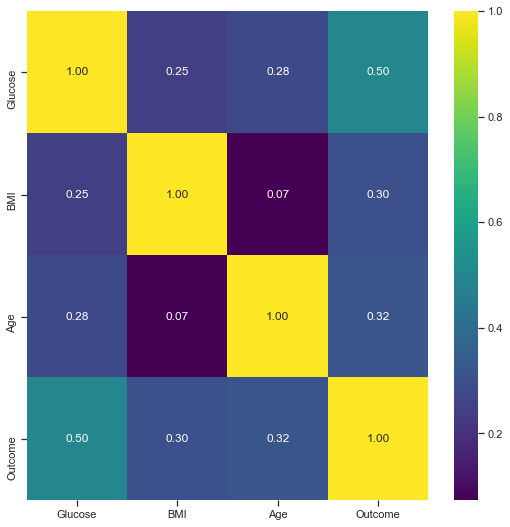

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True, cmap="viridis", fmt="0.2f");

### Predict the Same Test Point

In [43]:
# our test point .. this can be a patient who has just walked into a clinic
test_point = [[110, 35, 52]]

In [44]:
#model.predict(test_point)

In [45]:
probs = model.predict_proba(test_point)
print(f"Negative diagnosis chance is {100 * probs[0][1]:.2f}%")

Negative diagnosis chance is 45.66%


### Notice:
* Our logistic regression model agrees with our statistical model (the multivariate normal)
* Good stuff!

# Well Done!